"Analysis of data on cardiovascular diseases (search for insights, formulation of recommendations for stakeholders, building a predictive model for disease classification)".



In [4]:
import pandas as pd #importing the necessary libraries
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression   #importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


In [5]:
df=pd.read_csv('cardio_train.csv', sep=';') #reading the file

In [6]:
df.shape #number of rows and columns

(70000, 13)

In [7]:
print(df.columns.tolist()) #column names

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [8]:
df.dtypes #типы данных

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

Column Descriptions

age - Age

gender - Gender
  1 - Female
  2 - Male

height - Height in centimeters

weight - Weight in kilograms

ap_hi - Systolic blood pressure in mmHg

ap_lo - Diastolic blood pressure in mmHg

cholesterol - Cholesterol level:
  1 - Normal
  2 - Above Normal
  3 - Significantly Above Normal

gluc - Glucose level:
  1 - Normal
  2 - Above Normal
  3 - Significantly Above Normal

smoke - Smoking factor

alco - Alcohol factor

active - Physical activity

cardio - Presence/Absence of cardiovascular diseases


In [9]:
df['weight']= df['weight'].astype(int)  #converting the 'weight' column to the 'int' type

In [10]:
df.dtypes #cheking the result

id             int64
age            int64
gender         int64
height         int64
weight         int32
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object

In [11]:
df = df.drop(['id'], axis=1) #removing of  the 'id' column, it is not needed for further analysis

In [12]:
df.head(10) #the first 10 values in the data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
5,21914,1,151,67,120,80,2,2,0,0,0,0
6,22113,1,157,93,130,80,3,1,0,0,1,0
7,22584,2,178,95,130,90,3,3,0,0,1,1
8,17668,1,158,71,110,70,1,1,0,0,1,0
9,19834,1,164,68,110,60,1,1,0,0,0,0


In [13]:
df["age"] =(df["age"]/365.25).values.astype(int) #converting age to years, taking into account leap years

In [14]:
df.head(10) #cheking the result

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,47,1,156,56,100,60,1,1,0,0,0,0
5,59,1,151,67,120,80,2,2,0,0,0,0
6,60,1,157,93,130,80,3,1,0,0,1,0
7,61,2,178,95,130,90,3,3,0,0,1,1
8,48,1,158,71,110,70,1,1,0,0,1,0
9,54,1,164,68,110,60,1,1,0,0,0,0


In [15]:
df.describe() #basic statistical indicators

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.803257,1.349571,164.359229,74.204329,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.762462,0.476838,8.210126,14.395953,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.isna().sum() #cheking NaN values

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [17]:
sns.set(palette="Set2") #setting the color palette for the charts

<Axes: >

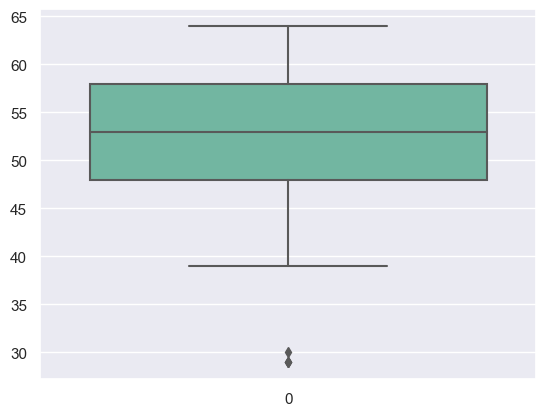

In [18]:
sns.boxplot(df['age']) #boxplot with whiskers for the 'age' column

<Axes: xlabel='age', ylabel='Count'>

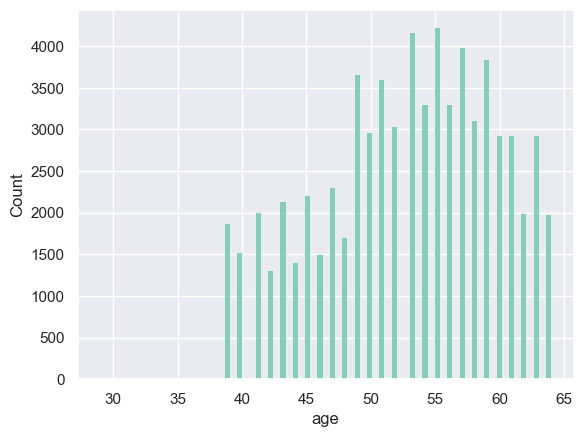

In [19]:
sns.histplot(df['age']) #histogram

<Axes: >

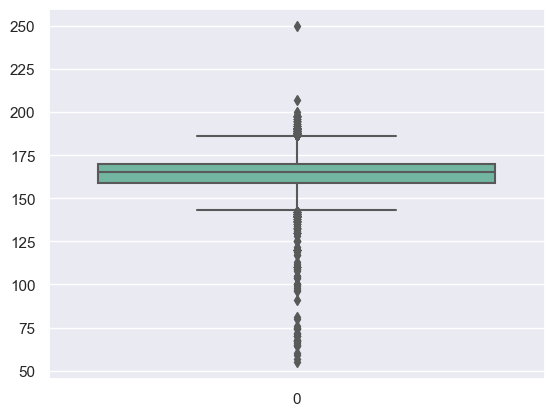

In [20]:
sns.boxplot(df['height']) #boxplot with whiskers for the 'height' column

<Axes: xlabel='height', ylabel='Count'>

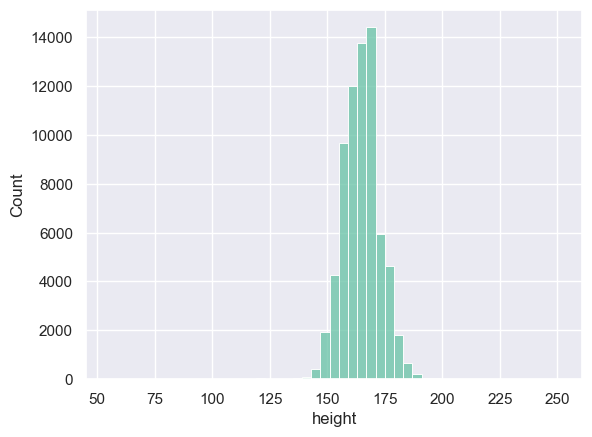

In [21]:
sns.histplot(df['height'],binwidth=4) #histogram

In [22]:
df =df[df.height >=147] #keeping rows where the height is greater than or equal to 147

In [23]:
df.shape #the new number of rows in the DataFrame

(69329, 12)

<Axes: >

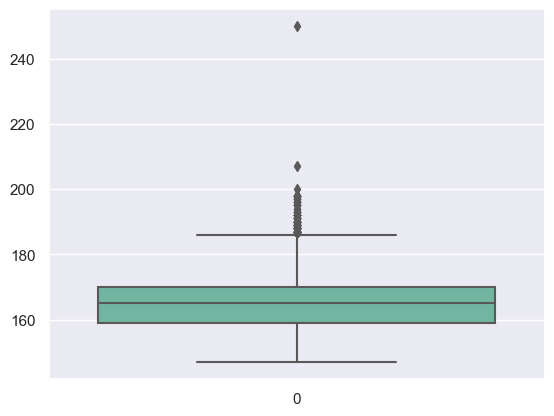

In [24]:
sns.boxplot(df['height'])

<Axes: >

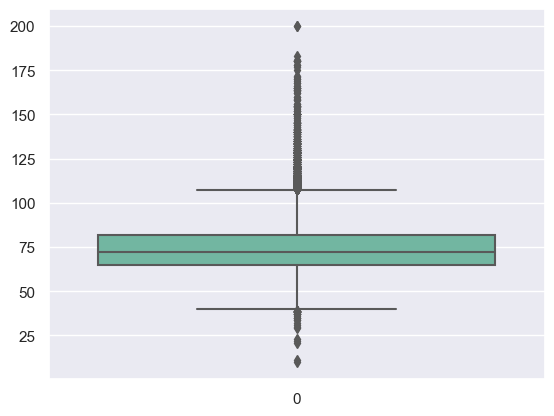

In [25]:
sns.boxplot(df['weight']) #boxplot with whiskers for the 'weight' column

<Axes: xlabel='weight', ylabel='Count'>

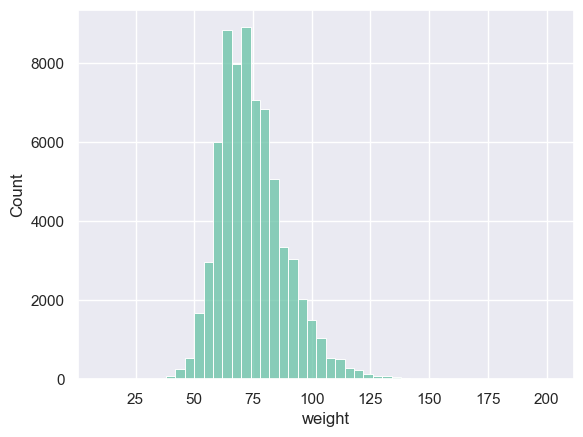

In [26]:
sns.histplot(df['weight'],binwidth=4) #histogram with column width set to 4 for better visibility

In [27]:
df = df[df.weight > 40] #resaving the DataFrame with values in the 'weight' column greater than 40

In [28]:
df.shape #there are 69,262 rows remaining for analysis

(69262, 12)

In [29]:
df.describe() #look at the statistics after the data cleaning

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69262.00000,69262.000000,69262.000000,69262.000000,69262.000000,69262.000000,69262.000000,69262.000000,69262.000000,69262.000000,69262.000000,69262.000000
mean,52.78603,1.352257,164.626317,74.320695,128.836072,96.636511,1.366247,1.226632,0.088750,0.054041,0.803846,0.499307
std,6.75957,0.477677,7.643127,14.271829,154.814684,189.044305,0.679746,0.572510,0.284385,0.226101,0.397089,0.500003
min,29.00000,1.000000,147.000000,41.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.00000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.00000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.00000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

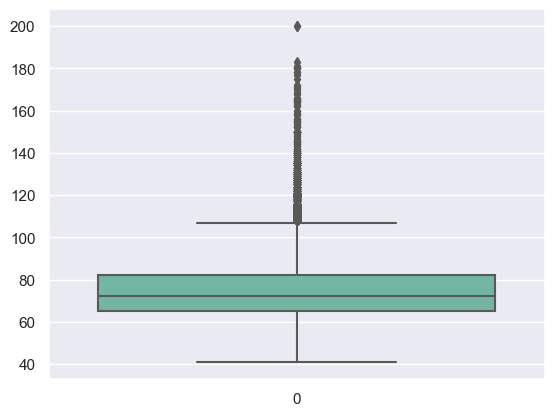

In [30]:
sns.boxplot(df['weight'])

<Axes: >

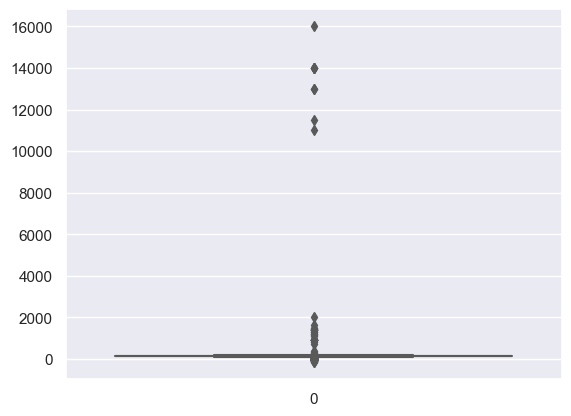

In [31]:
sns.boxplot(df['ap_hi']) #systolic blood pressure

In [32]:
print(np.where(df['ap_hi']<=0)) #row indices with values less than or equal to 0

(array([ 4568, 15860, 20337, 23760, 25005, 34692, 46148], dtype=int64),)


In [33]:
df.iloc[[ 4568, 15860, 20337, 23760, 25005, 34692, 46148]] #checking the data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,41,1,165,78,-100,80,2,1,0,0,1,0
16021,60,2,161,90,-115,70,1,1,0,0,1,0
20536,42,1,153,54,-100,70,1,1,0,0,1,0
23988,50,1,162,74,-140,90,1,1,0,0,1,1
25240,40,2,168,50,-120,80,2,1,0,0,0,1
35040,63,2,168,59,-150,80,1,1,0,0,1,1
46627,64,2,160,59,-120,80,1,1,0,0,0,0


In [34]:
df['ap_hi'] = df['ap_hi'].abs() #converting negative values to the absolute value of the number

In [35]:
df.iloc[[ 4568, 15860, 20337, 23760, 25005, 34692, 46148]] #checking the result

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,41,1,165,78,100,80,2,1,0,0,1,0
16021,60,2,161,90,115,70,1,1,0,0,1,0
20536,42,1,153,54,100,70,1,1,0,0,1,0
23988,50,1,162,74,140,90,1,1,0,0,1,1
25240,40,2,168,50,120,80,2,1,0,0,0,1
35040,63,2,168,59,150,80,1,1,0,0,1,1
46627,64,2,160,59,120,80,1,1,0,0,0,0


In [36]:
print(np.where(df['ap_lo']<=0)) #doing the same with the diastolic blood pressure indicator

(array([ 2000, 13360, 16296, 17206, 22704, 23640, 25219, 27431, 31478,
       37980, 39922, 41083, 41963, 43478, 45370, 47556, 52034, 56350,
       59469, 63114, 64611, 67936], dtype=int64),)


In [37]:
df['ap_lo'] = df['ap_lo'].abs()

In [38]:
df = df[df.ap_hi >= 50]    #resaving the DataFrame with realistic blood pressure values
df = df[df.ap_hi <= 200]
df = df[df.ap_lo >= 35]
df = df[df.ap_lo <= 130]

In [39]:
df.describe() #checking the statistics

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67956.000000,67956.000000,67956.00000,67956.000000,67956.000000,67956.000000,67956.000000,67956.000000,67956.000000,67956.000000,67956.000000,67956.000000
mean,52.771529,1.351257,164.62330,74.218862,126.545868,81.308788,1.363647,1.225764,0.088572,0.053741,0.803402,0.493981
std,6.763258,0.477367,7.63082,14.197307,16.504207,9.397456,0.678149,0.571775,0.284127,0.225507,0.397429,0.499967
min,29.000000,1.000000,147.00000,41.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.00000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.00000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.00000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.00000,200.000000,200.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df['cardio'].value_counts() #checking how many healthy patients and patients with cardiovascular diseases we have

0    34387
1    33569
Name: cardio, dtype: int64

<Axes: >

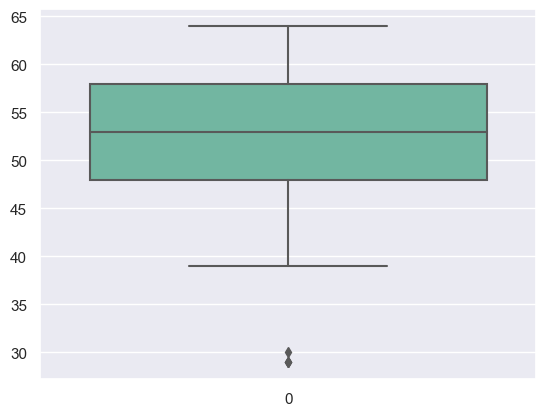

In [41]:
sns.boxplot(df['age']) #checking the age of our patients

<Axes: xlabel='cardio', ylabel='count'>

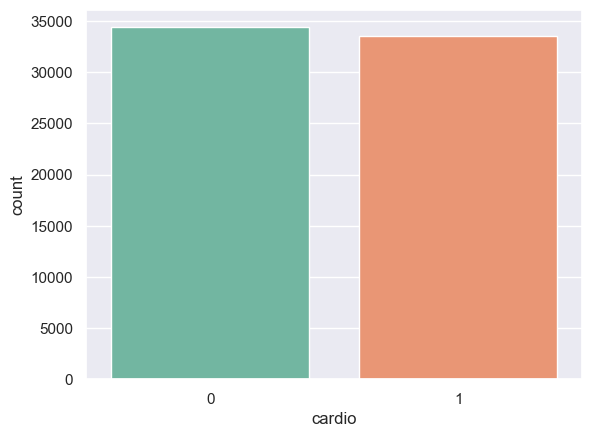

In [42]:
sns.countplot(x=df["cardio"]) #bar chart to illustrate that we have equal numbers of people in each group

In [43]:
df['gender'].value_counts() #checking the number of women and men

1    44086
2    23870
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

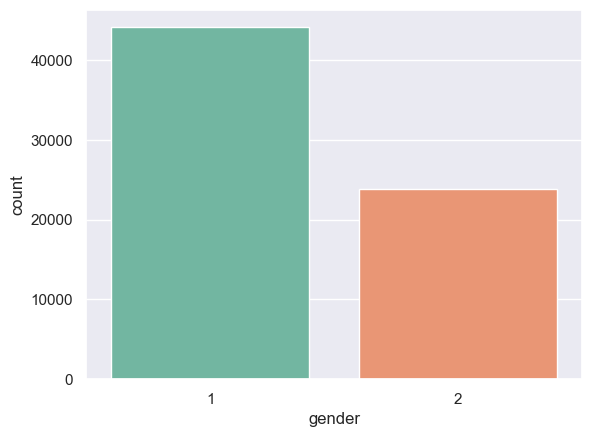

In [44]:
sns.countplot(x=df['gender']) #there are more women

<Axes: xlabel='gender', ylabel='count'>

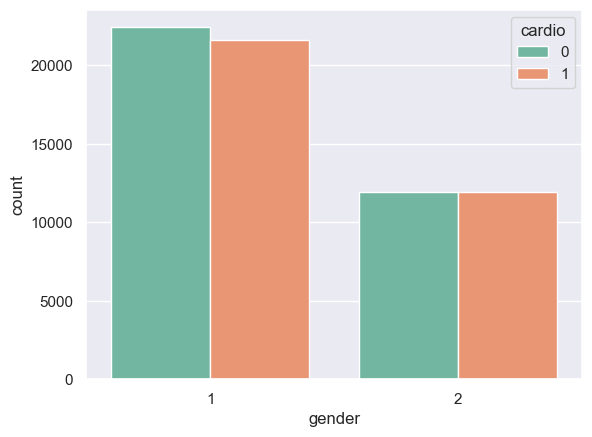

In [45]:
sns.countplot(x= 'gender',hue='cardio',data= df) #In terms of the presence of cardiovascular diseases, gender does not have an impact

In [46]:
df['smoke'].value_counts() #how many smokers and non-smokers do we have?

0    61937
1     6019
Name: smoke, dtype: int64

<Axes: xlabel='smoke', ylabel='count'>

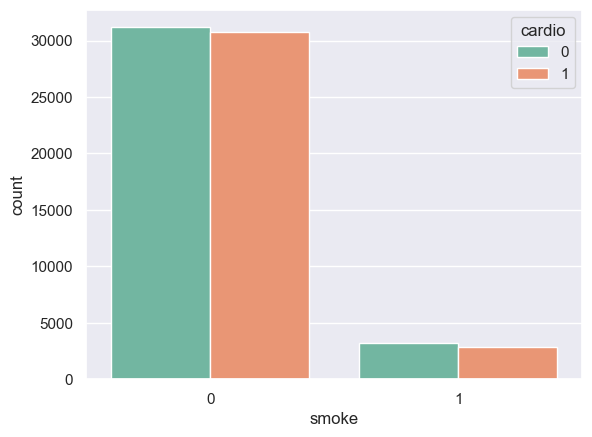

In [47]:
sns.countplot(x= 'smoke',hue='cardio',data= df) #looking at the chart, we mainly deal with non-smoking patients

In [48]:
df['alco'].value_counts() #and non-drinkers

0    64304
1     3652
Name: alco, dtype: int64

<Axes: xlabel='alco', ylabel='count'>

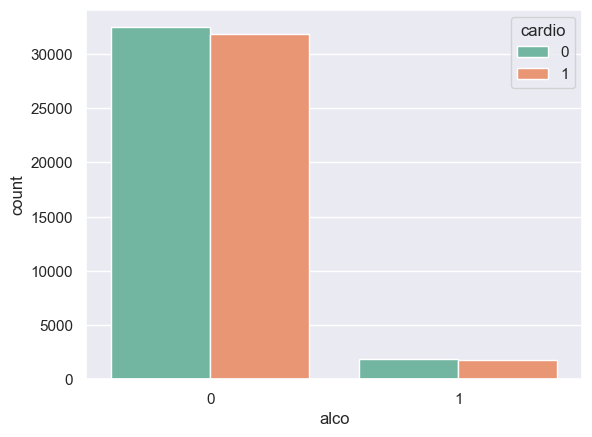

In [49]:
sns.countplot(x= 'alco',hue='cardio',data= df) #in terms of the presence or absence of cardiovascular diseases

<Axes: xlabel='active', ylabel='count'>

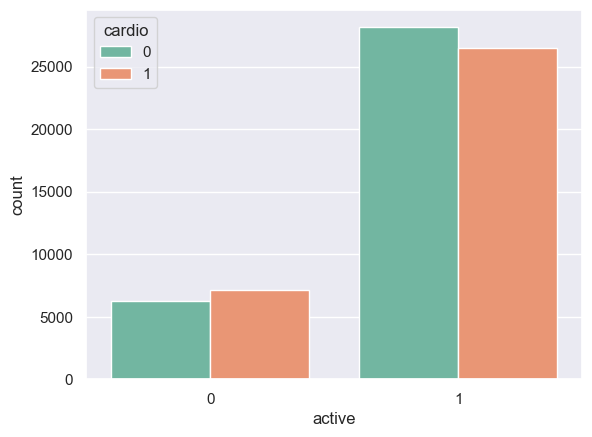

In [50]:
sns.countplot(x= 'active',hue='cardio',data= df) #checking among active and inactive individuals

<Axes: xlabel='cholesterol', ylabel='count'>

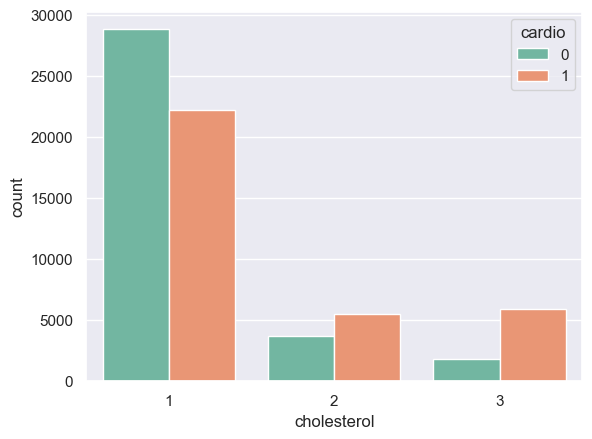

In [51]:
sns.countplot(x= 'cholesterol',hue='cardio',data= df) #cholesterol factor

<Axes: xlabel='gluc', ylabel='count'>

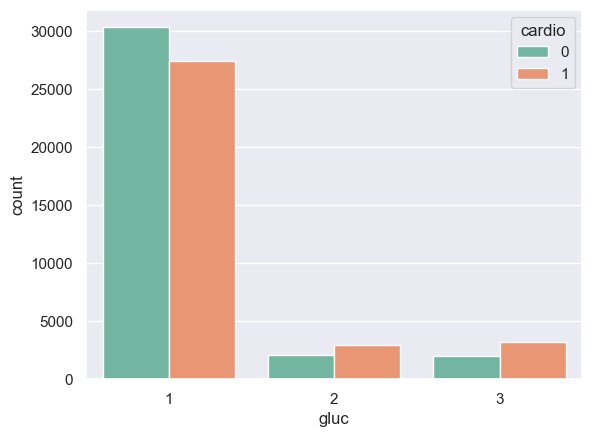

In [52]:
sns.countplot(x= 'gluc',hue='cardio',data= df) #glucose factor

<Axes: xlabel='age', ylabel='Count'>

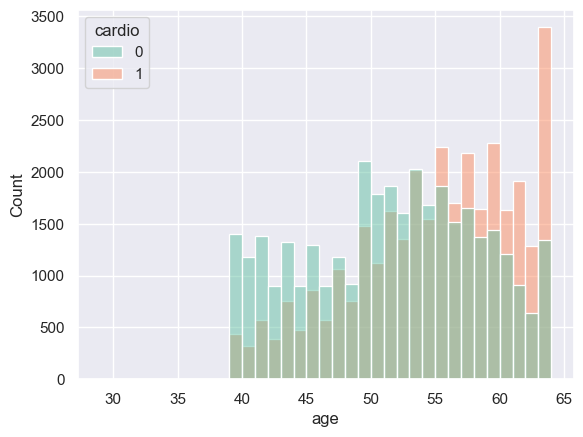

In [53]:
sns.histplot(x='age', hue = 'cardio', data=df, binwidth=1) #histogram of the cardiovascular disease factor in terms of age

<Axes: xlabel='ap_hi', ylabel='Count'>

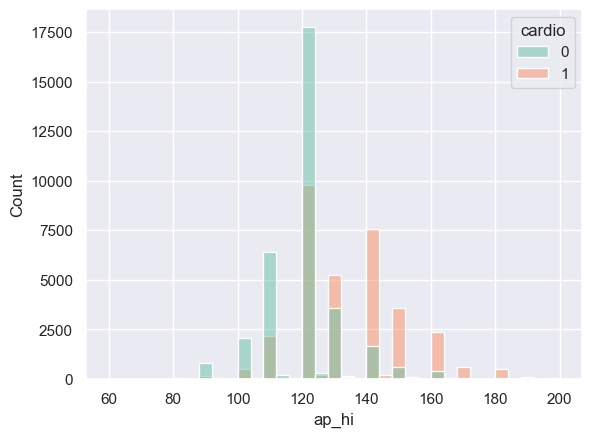

In [54]:
sns.histplot(x='ap_hi', hue = 'cardio', data=df, binwidth=4) #histogram of the cardiovascular disease factor in terms of systolic blood pressure

<Axes: xlabel='ap_lo', ylabel='Count'>

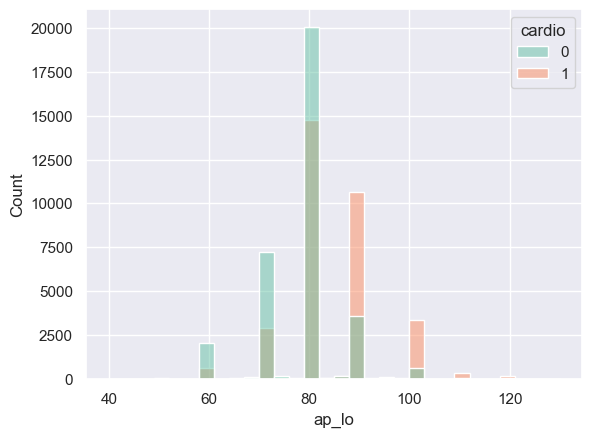

In [55]:
sns.histplot(x='ap_lo', hue = 'cardio', data=df, binwidth=3) #and diastolic blood pressure

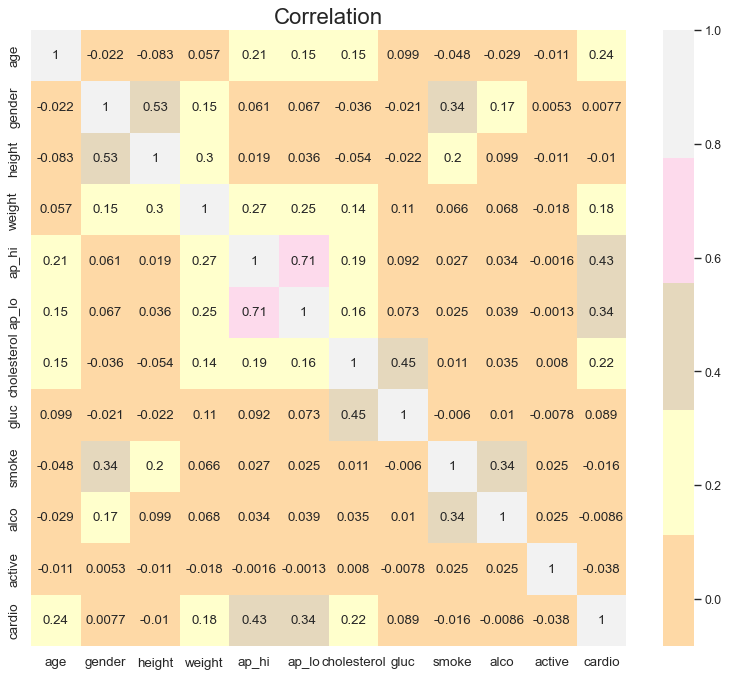

In [56]:
plt.figure(figsize=(12,10), dpi= 80) #correlation plot, adjusting size, color, and indicators
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='Pastel1', center=0, annot=True)

# Decorations
plt.title('Correlation', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We observe a slight correlation between the factor of cardiovascular disease presence and blood pressure indicators

Building the model

In [57]:
y = df['cardio'] #identifying our cardiovascular disease factor
X = df.drop(['cardio'], axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #splitting, 80% for training and 20% for testing

In [59]:
logreg = LogisticRegression() #building the model
logreg.fit(X_train, y_train)


C:\Users\CC-Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred_train = logreg.predict(X_train) #making predictions on the training data

In [61]:
accuracy_score(y_train, y_pred_train) #the accuracy of the logistic regression classifier on the training set

0.7129902141122801

In [62]:
y_pred_test = logreg.predict(X_test) #making predictions on the test data

In [63]:
accuracy_score(y_test, y_pred_test) #the accuracy of the logistic regression classifier on the test set

0.7218216597998823

In [64]:
data = [{'age': 33,   #generating a DataFrame, for example, using my own indicators
      'gender': 1,
      'height': 162,
      'weight': 54,
      'ap_hi': 120,
      "ap_lo": 70,
      'cholesterol': 1,
      'gluc': 1,
      'smoke': 0,
      'alco': 1,
      'active': 1,
}]

In [65]:
df_test = pd.DataFrame(data)
df_test.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,33,1,162,54,120,70,1,1,0,1,1


In [66]:
logreg.predict(df_test) #the model predicts the absence of cardiovascular diseases

array([0], dtype=int64)

Conclusions:

We built a logistic regression model to predict cardiovascular conditions with a prediction accuracy of 72.2 percent.

The most influential factors in the development of cardiovascular diseases are:

    Blood pressure
    Age
    Cholesterol level
    Glucose level